In [1]:
import numpy as np
import scipy.integrate
import matplotlib.pyplot as plt

In [2]:
fact = 0.0483 #2m/hbar2 in 1/(MeV fm2)
L=2.
h = 1E-3
Xmax = 10.
V0 = -83.
Xmatch = L

In [3]:
def V(x):
    if(abs(x)<=L):
        v = V0
    else:
        v = 0.
    return v

def k2(E,x):
    K2 = fact*(E-V(x))
    return K2

def Numerov(psi0,psi1,x,h,E):
    C = 1./12.
    TERM1 = 2.*psi1 - psi0 - h**2.*k2(E,x)*psi1
    TERM2 = C*h**2.*(2.*k2(E,x)*psi1 - k2(E,x-h)*psi0)
    return (TERM1+TERM2)/(1.+C*h**2.*k2(E,x+h))

def intNumerov(E,x,h):
    psi0,psi1 = 0.,abs(h)
    PSI = [psi0,psi1]
    X = [x,x+h]
    Arr = np.arange(x+2*h,Xmatch+h,h)
    for x in Arr:
        psi = Numerov(psi0,psi1,x,h,E)
        psi0 = psi1
        psi1 = psi
        PSI.append(psi), X.append(x)
    return PSI,X

def Biseccion(f,a, b,TOL=1.E-7, N=100):
    i = 1
    FA = f(a)
    while(i<=N):
        p = a + (b-a)/2.0
        FP = f(p)
        if (FP == 0.0) or ((b-a)/2.0 < TOL):
            j = 1
            break
        i = i+1
        if (FA * FP > 0.0):	
            a = p
            FA = FP
        else:
            b=p
    return p

def logDeriv(E):
    PSIr,Xr = intNumerov(E,Xmax,-h)
    PSIl,Xl = intNumerov(E,-Xmax,h)
    difPsir = np.diff(PSIr)/np.diff(Xr)
    difPsil = np.diff(PSIl)/np.diff(Xl)
    LCoef = difPsil[-1]/PSIl[-1]
    RCoef = difPsir[-1]/PSIr[-1]
    Delta = (LCoef-RCoef)/(LCoef+RCoef)
    return Delta

def Normalize(F):
    F2=np.array(F)**2.    
    I= scipy.integrate.simps(F2,dx=h)
    F=F/np.sqrt(I)
    return F

In [4]:
#Buscando los intervalos
Energy = np.linspace(V0,0,100)
Del = []
for i in range(len(Energy)):
    Del.append(logDeriv(Energy[i]))

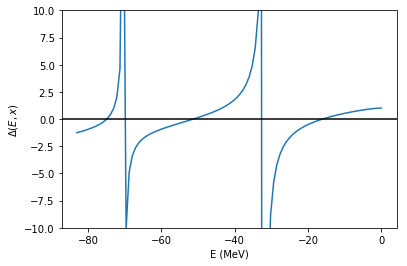

In [5]:
plt.plot(Energy,Del)
plt.axhline(y=0.,color='k')
plt.xlabel('E (MeV)')
plt.ylabel(r'$\Delta(E,x)$')
plt.ylim(-10,10)
plt.show()

In [6]:
# Energias ligadas
E0 = Biseccion(logDeriv,-83,-70)
E1 = Biseccion(logDeriv,-60,-40)
E2 = Biseccion(logDeriv,-30,0)
E = [E0,E1,E2]
n = 0
for e in E:
    print('n: %i ; E=% f'%(n,e))
    n +=1

n: 0 ; E=-74.881187
n: 1 ; E=-51.295141
n: 2 ; E=-16.044263


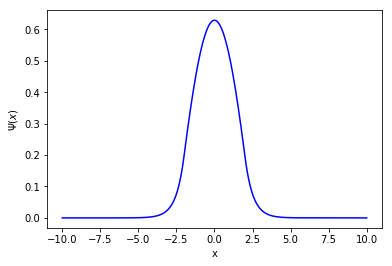

In [7]:
PSIr,Xr = intNumerov(E0,Xmax,-h)
PSIl,Xl = intNumerov(E0,-Xmax,h)
PSI = PSIr + PSIl[::-1]
PSI = Normalize(PSI)
X = Xr + Xl[::-1]

plt.plot(X,PSI,'b')
plt.xlabel('x')
plt.ylabel(r'$\Psi(x)$')
plt.show()

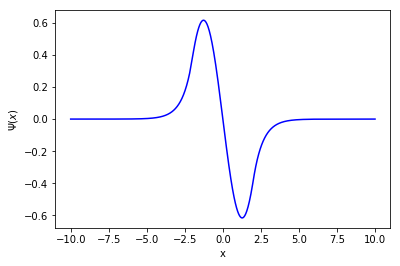

In [8]:
#Cambio de signo por solucion impar
PSIr,Xr = intNumerov(E1,Xmax,-h)
PSIl,Xl = intNumerov(E1,-Xmax,h)

PSI = [-psir for psir in PSIr] + PSIl[::-1]
PSI = Normalize(PSI)
X =  Xr + Xl[::-1]
plt.plot(X,PSI,'b')
plt.xlabel('x')
plt.ylabel(r'$\Psi(x)$')
plt.show()


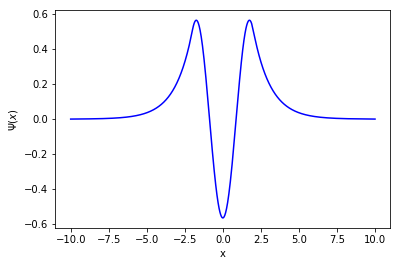

In [9]:
PSIr,Xr = intNumerov(E2,Xmax,-h)
PSIl,Xl = intNumerov(E2,-Xmax,h)
PSI = PSIr + PSIl[::-1]
PSI = Normalize(PSI)
X = Xr + Xl[::-1]
plt.plot(X,PSI,'b')
plt.xlabel('x')
plt.ylabel(r'$\Psi(x)$')
plt.show()